# Proyecto 1 - Juan Luis Baldelomar Cabrera

In [48]:
import pandas
import numpy as np

from nltk import TweetTokenizer
from nltk.corpus import stopwords

from nltk.probability import FreqDist

# Load Data

In [14]:
import pandas
xls = pandas.ExcelFile('Opiniones Tripadvisor_nlp2022.xlsx')
ds1, ds1_name = pandas.read_excel(xls, 'BasilicaColegiata'), 'Basilica Colegiata'
ds2, ds2_name = pandas.read_excel(xls, 'MercadoHidalgo'),    'Mercado Hidalgo'
ds3, ds3_name = pandas.read_excel(xls, 'CasaDiegoRivera'),   'Casa de Diego Rivera'
ds4, ds4_name = pandas.read_excel(xls, 'UG'),                'Universidad de Guanajuato'
ds5, ds5_name = pandas.read_excel(xls, 'Alhondiga'),         'Alhondiga'
ds6, ds6_name = pandas.read_excel(xls, 'TeatroJuarez'),      'Teatro Juarez'
ds7, ds7_name = pandas.read_excel(xls, 'JardinUnion'),       'Jardin Union'
ds8, ds8_name = pandas.read_excel(xls, 'CallejonBeso'),      'Callejon del Beso'
ds9, ds9_name = pandas.read_excel(xls, 'Pipila'),            'Monumento al Pipila'
ds10, ds10_name = pandas.read_excel(xls, 'MuseoMomias'),     'Museo de las Momias'

In [16]:
ds1

,Género,Edad,Nacional ó Internacional,Calificación,Escala,Número de aportaciones,Título de la opinión,Opinión,País,Idioma,Dispositivo,Fecha
0,Femenino,64.0,Internacional,Muy bueno,4,175,"""Punto central""","""Basílica muy bien conservada, punto central e...",Colombia,Español,Móvil,2018-05-13
1,Masculino,59.0,Internacional,Excelente,5,306,"""The most important church in this colonial to...","""The Basilica (Guanajuato does not have a Cath...",Colombia,Inglés,PC,2018-05-08
2,Femenino,26.0,Internacional,Excelente,5,106,"""Y uno de los símbolos de Guanajuato""","""Edificio de la iglesia amarilla es un abigarr...",Corea del Sur,Coreano,PC,2018-05-05
3,Masculino,50.0,Internacional,Excelente,5,62,"""Beautiful and a must see""","""A must see place in town and very nice to go ...",Estados Unidos,Inglés,PC,2018-05-01
4,Femenino,55.0,Internacional,Regular,3,59,"""Nice""","""Not particularly impressive, but if you like ...",Estados Unidos,Inglés,PC,2018-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...
555,Femenino,43.0,Nacional,Muy bueno,4,12,"""Hermosa iglesia""","""Es un sitio lleno de contrastes. Fuera del te...",México,Español,PC,2011-12-03
556,Masculino,38.0,Internacional,Excelente,5,11,"""Historical""","""I walked into the Basilica and felt suddenly ...",Canadá,Inglés,PC,2011-09-17
557,Femenino,23.0,Nacional,Excelente,5,2,"""Basílica de Nuestra Señora de Guanajuato""","""Un lugar al buen estilo barroco, puedes admir...",México,Español,PC,2011-09-11
558,Femenino,49.0,Nacional,Excelente,5,60,"""Beautiful Church""","""The inside of this Church in Plaza la Paz, is...",México,Inglés,PC,2011-09-02


In [15]:
datasets = [ds1, ds2, ds3, ds4, ds5, ds6, ds7, ds8, ds9, ds10]
ds_names = [ds1_name, ds2_name, ds3_name, ds4_name, ds5_name, ds6_name, ds7_name, ds8_name, ds9_name, ds10_name]

In [ ]:
all_docs = []
for ds in datasets:
    docs = list(ds['Opinión'])

# Utilities

In [20]:
def bold_string(string):
    return '\033[1m' + string + '\033[0m '

def dummy(doc):
    return doc

In [65]:
from nltk import TweetTokenizer
from nltk.corpus import stopwords

def process_documents(documents):
    docs = []
    tokenizer = TweetTokenizer()
    for doc in documents:
        docs.append(tokenizer.tokenize(doc.lower().replace('\"','')))
        
    return docs

def get_vocabulary(docs, size=-1):
    tokens = [word for doc in docs for word in doc]
    voc = FreqDist(tokens).most_common(size) if size!= -1 else FreqDist(tokens).most_common()
    voc_dict = {}
    for i, (word, _) in enumerate(voc):
        voc_dict[word] = i
        
    return voc_dict

In [37]:
from sklearn.feature_extraction.text import CountVectorizer as bow_builder
from sklearn.feature_selection import chi2 

def chi_sqr(tf_matrix, labels):
    Nt = len(tf_matrix)
    n_i = np.sum(tf_matrix>0, axis=0)
    n_i1 = np.sum((tf_matrix * labels)>0, axis=0)
    n_i0 = np.sum((tf_matrix * (1-labels))>0, axis=0)
    n_1 = np.sum(labels, axis=0)
    n_0 = Nt - n_1
    # compute chi
    chi_1 = Nt*(Nt * n_i1 - n_1 * n_i)**2/(n_1 * n_i * (Nt - n_1) * (Nt - n_i))
    chi_0 = Nt*(Nt * n_i0 - n_0 * n_i)**2/(n_0 * n_i * (Nt - n_0) * (Nt - n_i))
    
    # get chi average
    chi_avg = n_1/Nt * chi_1 +  n_0/Nt * chi_0 
    
    return np.nan_to_num(chi_avg)

def reduce_dims(bow, voc_index, labels, n=-1, limit=-1):
    # compute chi avg
    chi_avg = chi_sqr(bow, np.array(labels)[:, np.newaxis])
    lim = np.mean(chi_avg) if limit==-1 else limit
    
    new_dict = {}
    counter = 0
    
    if n != -1:
        n_max_chi = np.flip(np.argsort(chi_avg))[:n]
        voc_index_list = list(voc_index)
        for i, index in enumerate(n_max_chi):
            word = voc_index_list[index]
            new_dict[word] = i
        chi_avg = chi_avg[n_max_chi]
    else:
        for i, word in enumerate(voc_index.keys()):
            if chi_avg[i] >= lim:
                new_dict[word] = counter
                counter += 1
        chi_avg = chi_avg[chi_avg>=lim]
        
    return new_dict, chi_avg

def get_features(documents, labels, n, T=10000):
    bow_builder = BoWBuilder()
    bow = bow_builder.build_bow(documents, T=T, weight_scheme='tf')
    voc_index, chi = reduce_dims(bow, bow_builder.voc_index, labels, n=n)
    return voc_index, chi

In [66]:
docs = [['hola', 'mundo'],['documento', 'numero', '2', 'orale'],['que', 'bonito', 'es', 'lo', 'bonito']]
vocabulary = get_vocabulary(docs)
bow_b = bow_builder(max_features=10000, vocabulary=vocabulary, binary=False, tokenizer=dummy, preprocessor=dummy, stop_words=['hola'])
bow = bow_b.transform(docs)
bow_b.get_feature_names_out()

array(['bonito', 'hola', 'mundo', 'documento', 'numero', '2', 'orale',
       'que', 'es', 'lo'], dtype=object)

In [67]:
bow.toarray()

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 1, 1, 1]])

# Estadísticas

In [72]:
import matplotlib.pyplot as plt

## Promedio de Puntuación

In [43]:
for ds, name in zip(datasets, ds_names):
    scores = np.array(list(map(int, ds['Escala'])))
    print('{0:40} puntuación media: {1:.2f} \t std dev: {2:.2f}'.format(bold_string(name), np.mean(scores), np.std(scores)))

Basilica Colegiata               puntuación media: 4.50 	 std dev: 0.67
Mercado Hidalgo                  puntuación media: 3.95 	 std dev: 0.95
Casa de Diego Rivera             puntuación media: 4.24 	 std dev: 0.80
Universidad de Guanajuato        puntuación media: 4.60 	 std dev: 0.61
Alhondiga                        puntuación media: 4.45 	 std dev: 0.75
Teatro Juarez                    puntuación media: 4.70 	 std dev: 0.52
Jardin Union                     puntuación media: 4.59 	 std dev: 0.61
Callejon del Beso                puntuación media: 4.00 	 std dev: 0.97
Monumento al Pipila              puntuación media: 4.38 	 std dev: 0.77
Museo de las Momias              puntuación media: 3.68 	 std dev: 1.14


## Longitud Promedio de Comentarios

In [71]:
for ds, name in zip(datasets, ds_names):
    opinions = list(ds['Opinión'])
    opinions = process_documents(opinions)
    opinion_nWords = np.array([len(opinion) for opinion in opinions])
    print('{0:40} longitud media de opiniones: {1:.2f} \t std dev: {2:.2f}'.format(bold_string(name), np.mean(opinion_nWords), np.std(opinion_nWords)))

Basilica Colegiata               longitud media de opiniones: 46.35 	 std dev: 32.55
Mercado Hidalgo                  longitud media de opiniones: 53.68 	 std dev: 38.05
Casa de Diego Rivera             longitud media de opiniones: 56.77 	 std dev: 33.55
Universidad de Guanajuato        longitud media de opiniones: 41.49 	 std dev: 22.25
Alhondiga                        longitud media de opiniones: 53.59 	 std dev: 37.36
Teatro Juarez                    longitud media de opiniones: 48.47 	 std dev: 29.93
Jardin Union                     longitud media de opiniones: 50.84 	 std dev: 41.72
Callejon del Beso                longitud media de opiniones: 52.45 	 std dev: 36.60
Monumento al Pipila              longitud media de opiniones: 54.80 	 std dev: 40.15
Museo de las Momias              longitud media de opiniones: 67.15 	 std dev: 51.98


## Promedio de Edades

In [42]:
for ds, name in zip(datasets, ds_names):
    scores = np.array(list(map(float, ds['Edad'])))
    print('{0:40} edad media: {1:.2f} \t std dev: {2:.2f}'.format(bold_string(name), np.nanmean(scores), np.nanstd(scores)))

Basilica Colegiata               edad media: 41.87 	 std dev: 14.82
Mercado Hidalgo                  edad media: 40.69 	 std dev: 15.07
Casa de Diego Rivera             edad media: 44.35 	 std dev: 15.11
Universidad de Guanajuato        edad media: 39.31 	 std dev: 13.92
Alhondiga                        edad media: 40.71 	 std dev: 13.34
Teatro Juarez                    edad media: 41.75 	 std dev: 13.81
Jardin Union                     edad media: 41.39 	 std dev: 14.88
Callejon del Beso                edad media: 38.83 	 std dev: 13.33
Monumento al Pipila              edad media: 38.44 	 std dev: 13.05
Museo de las Momias              edad media: 38.96 	 std dev: 12.88


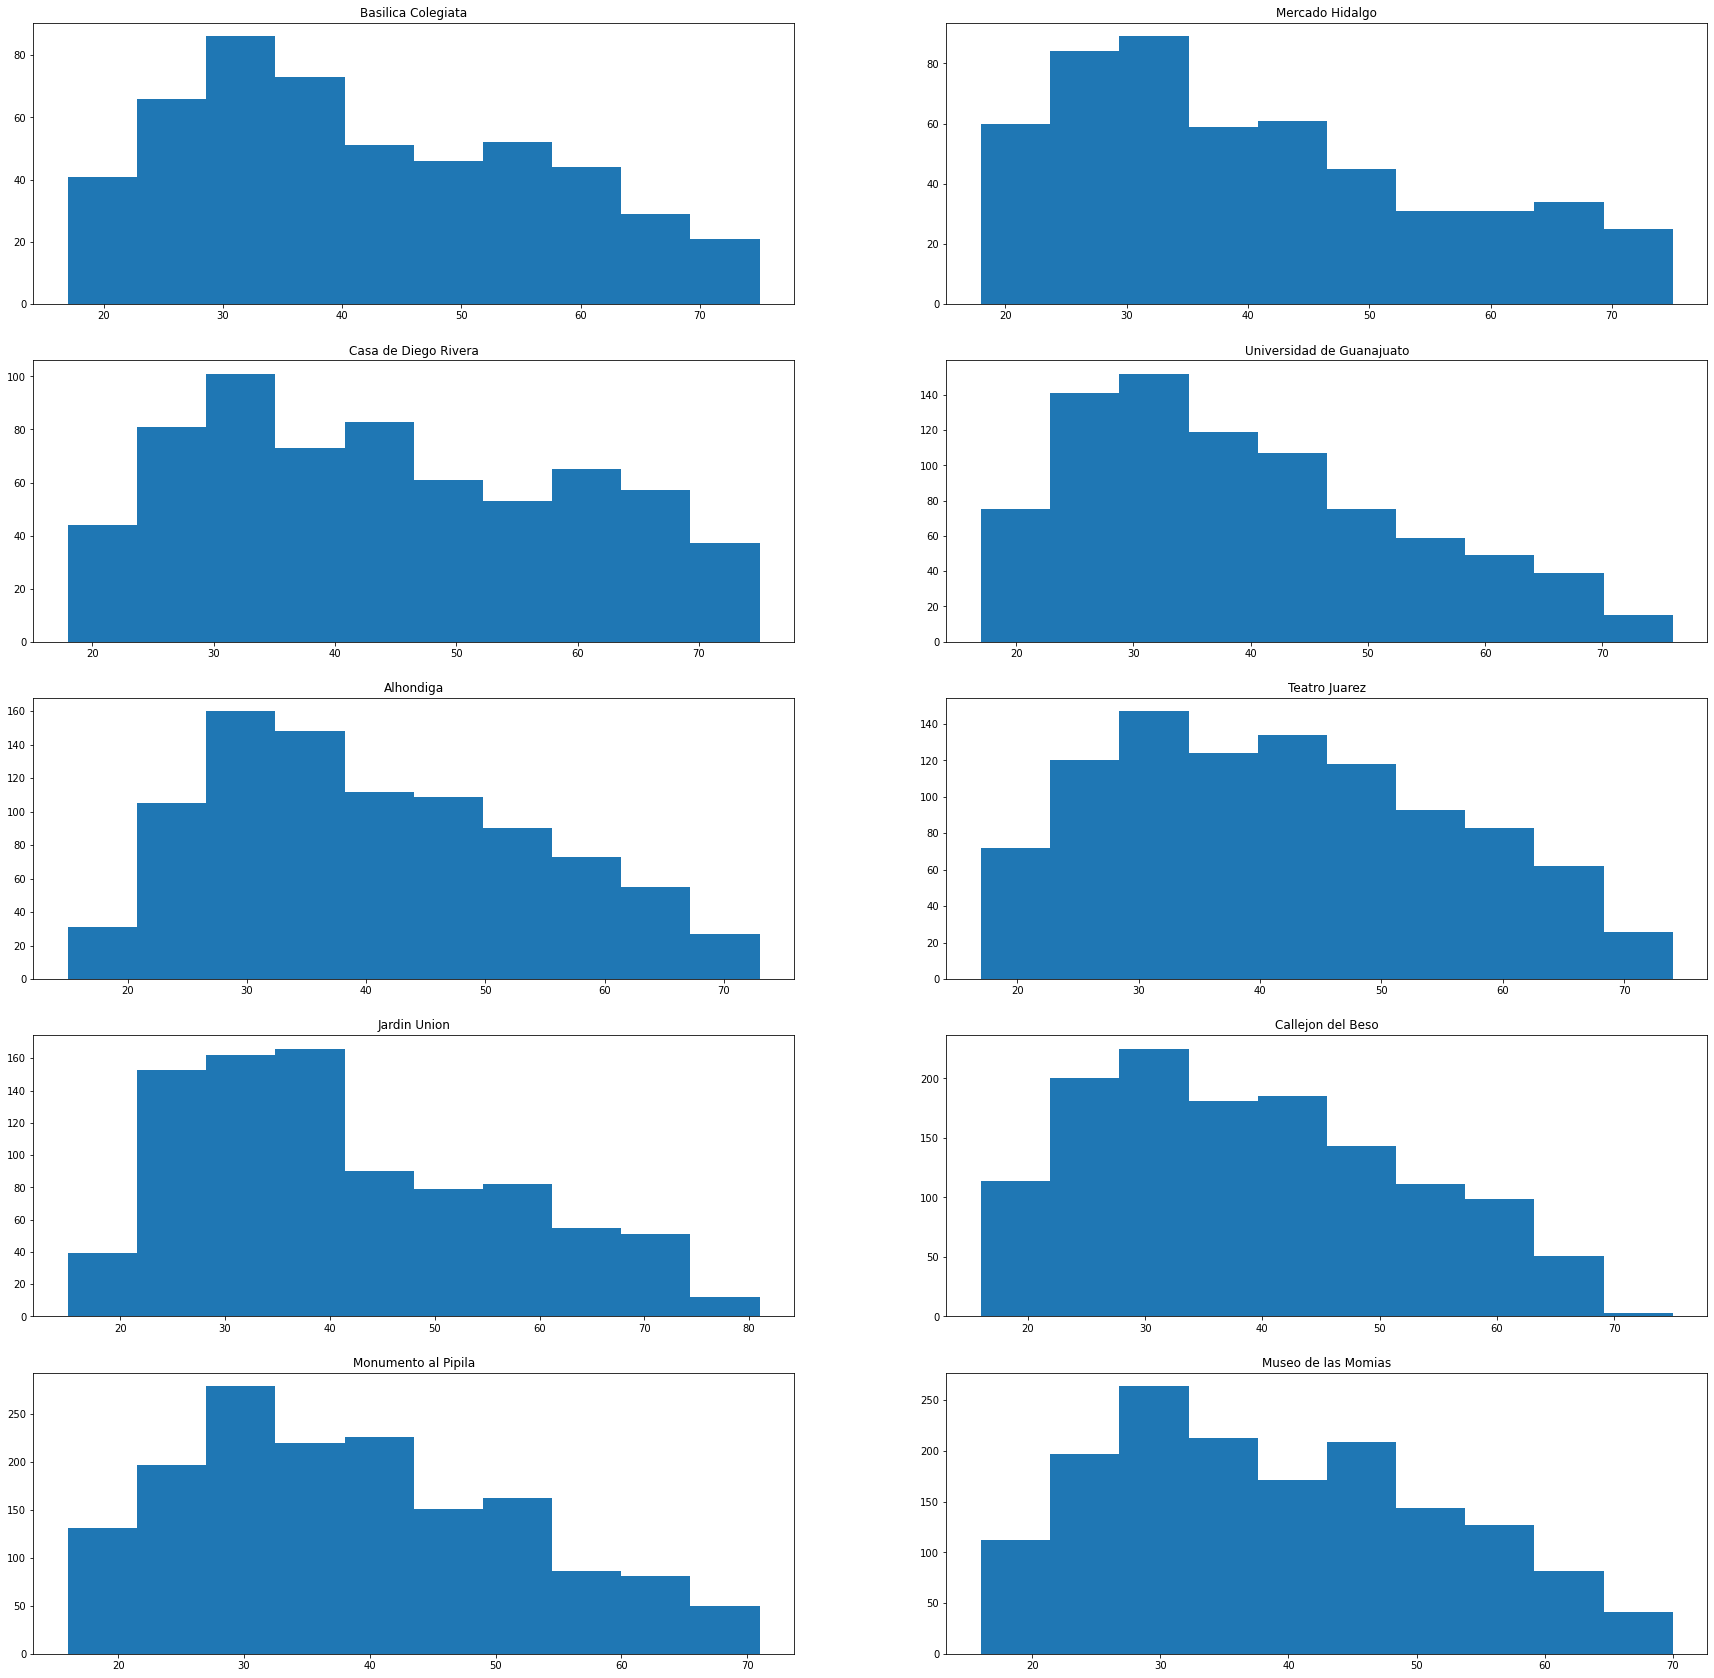

In [74]:
plt.figure(figsize=(30, 30))
for i, (ds, name) in enumerate(zip(datasets, ds_names)):
    ages = np.array(list(map(float, ds['Edad'])))
    plt.subplot(5, 2, i+1)
    plt.title(name)
    plt.hist(ages)
plt.show()